In [1]:
from openbb_terminal.sdk import openbb
import pandas as pd
import numpy as np

%matplotlib inline

In [39]:
#setup for multiple stocks & close prices
start = "2013-01-01"
end = "2023-04-10"

symbols = ["AAPL"]

stock_data = openbb.economy.index(symbols, start_date = start, end_date = end)
stock_data

,AAPL
Date,
2013-01-02,16.837116
2013-01-03,16.624598
2013-01-04,16.161516
2013-01-07,16.066462
2013-01-08,16.109692
...,...
2023-03-31,164.899994
2023-04-03,166.169998
2023-04-04,165.630005


In [40]:
stock_data = stock_data.reset_index()
stock_data

,Date,AAPL
0,2013-01-02,16.837116
1,2013-01-03,16.624598
2,2013-01-04,16.161516
3,2013-01-07,16.066462
4,2013-01-08,16.109692
...,...,...
2579,2023-03-31,164.899994
2580,2023-04-03,166.169998
2581,2023-04-04,165.630005
2582,2023-04-05,163.759995


In [41]:
stock_data.dtypes

Date    datetime64[ns]
AAPL           float64
dtype: object

In [42]:
stock_data = stock_data.set_index("Date")
stock_data

,AAPL
Date,
2013-01-02,16.837116
2013-01-03,16.624598
2013-01-04,16.161516
2013-01-07,16.066462
2013-01-08,16.109692
...,...
2023-03-31,164.899994
2023-04-03,166.169998
2023-04-04,165.630005


In [43]:
# pull aapl earnings estimates vs actuals
aapl_eps = openbb.stocks.fa.earnings('AAPL', quarterly = True)
aapl_eps

,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
0,2024-01-31,-,-,-
2,2023-10-25,-,-,-
3,2023-07-26,-,-,-
4,2023-04-26,1.43,-,-
5,2023-02-02,1.94,1.88,-0.0289
6,2022-10-27,1.27,1.29,0.0157
7,2022-07-28,1.16,1.2,0.0327
8,2022-04-28,1.43,1.52,0.0644
9,2022-01-27,1.89,2.1,0.1117
10,2021-10-28,1.24,1.24,0.0032


In [44]:
aapl_short_interest = openbb.stocks.dps.spos("AAPL")
aapl_short_interest = aapl_short_interest.set_index("dates")
aapl_short_interest

,Net Short Vol. (1k $),Position (1M $)
dates,,
2023-04-10,280.82651,-6983.75
2023-04-06,182.15430,-7970.80
2023-04-05,-874.91007,-8797.83
2023-04-04,-828.87430,-8488.72
2023-04-03,202.72723,-8266.10
...,...,...
2022-04-18,96.53921,-2562.94
2022-04-14,-721.99532,-2659.48
2022-04-13,-578.15970,-1937.49


In [45]:
aapl_short_interest["close"] = stock_data["AAPL"]
aapl_short_interest

,Net Short Vol. (1k $),Position (1M $),close
dates,,,
2023-04-10,280.82651,-6983.75,NaN
2023-04-06,182.15430,-7970.80,164.660004
2023-04-05,-874.91007,-8797.83,163.759995
2023-04-04,-828.87430,-8488.72,165.630005
2023-04-03,202.72723,-8266.10,166.169998
...,...,...,...
2022-04-18,96.53921,-2562.94,164.076080
2022-04-14,-721.99532,-2659.48,164.294754
2022-04-13,-578.15970,-1937.49,169.373978


<AxesSubplot: xlabel='dates'>

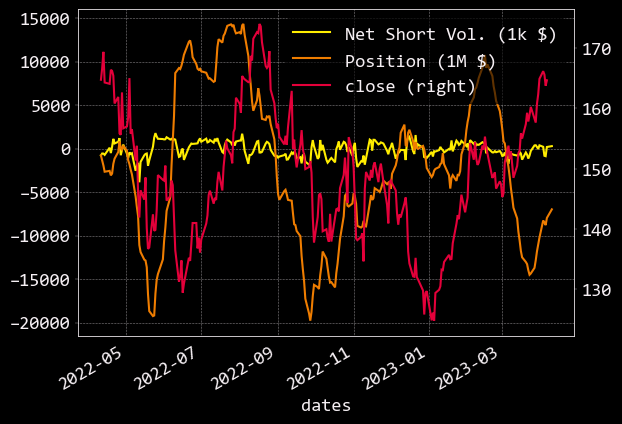

In [49]:
aapl_short_interest.plot(secondary_y = "close")

In [65]:
openbb.stocks.fa.rot("AAPL")

API_FINNHUB_KEY not defined. Set API Keys in ~/.openbb_terminal/.env or under keys menu.

In [53]:
aapl_pt = openbb.stocks.fa.pt("AAPL")
aapl_pt

,Company,Rating,Price Target
Date,,,
2021-04-29,"Raymond James Financial, Inc.",BUY,185.0
2021-04-29,Goldman Sachs,HOLD,130.0
2021-04-29,Credit Suisse,HOLD,150.0
2021-04-29,Capital Depesche,BUY,165.0
2021-04-29,Jefferies & Company Inc.,BUY,175.0
...,...,...,...
2023-03-06,Goldman Sachs,BUY,199.0
2023-03-08,Wedbush Morgan Securities Inc.,BUY,190.0
2023-03-10,"Needham & Company, LLC",BUY,170.0


In [63]:
aapl_pt["close"] = stock_data["AAPL"]
aapl_pt_plot = aapl_pt.drop(columns=["Company", "Rating"])
aapl_pt_plot

,Price Target,close
Date,,
2021-04-29,185.0,131.892395
2021-04-29,130.0,131.892395
2021-04-29,150.0,131.892395
2021-04-29,165.0,131.892395
2021-04-29,175.0,131.892395
...,...,...
2023-03-06,199.0,153.830002
2023-03-08,190.0,152.869995
2023-03-10,170.0,148.500000


<AxesSubplot: xlabel='Date'>

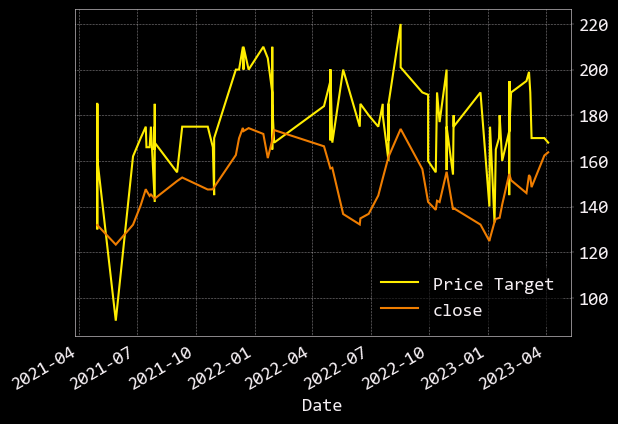

In [64]:
aapl_pt_plot.plot()

In [9]:
#since date is an object (checked with dtypes) convert to datetime
aapl_eps["Earnings Date"] = pd.to_datetime(aapl_eps["Earnings Date"])
aapl_eps

,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
0,2024-01-31,-,-,-
2,2023-10-25,-,-,-
3,2023-07-26,-,-,-
4,2023-04-26,1.43,-,-
5,2023-02-02,1.94,1.88,-0.0289
6,2022-10-27,1.27,1.29,0.0157
7,2022-07-28,1.16,1.2,0.0327
8,2022-04-28,1.43,1.52,0.0644
9,2022-01-27,1.89,2.1,0.1117
10,2021-10-28,1.24,1.24,0.0032


In [10]:
aapl_eps.dtypes

Earnings Date    datetime64[ns]
EPS Estimate             object
Reported EPS             object
Surprise(%)              object
dtype: object

In [11]:
aapl_eps = aapl_eps.set_index("Earnings Date")
aapl_eps

,EPS Estimate,Reported EPS,Surprise(%)
Earnings Date,,,
2024-01-31,-,-,-
2023-10-25,-,-,-
2023-07-26,-,-,-
2023-04-26,1.43,-,-
2023-02-02,1.94,1.88,-0.0289
2022-10-27,1.27,1.29,0.0157
2022-07-28,1.16,1.2,0.0327
2022-04-28,1.43,1.52,0.0644
2022-01-27,1.89,2.1,0.1117


In [12]:
#pull aapl OHLCV data
aapl_all_stock_data = openbb.stocks.load("AAPL", start_date = "2013-01-01")
aapl_all_stock_data

Loading Daily data for AAPL with starting period 2013-01-02.

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
date,,,,,,,,
2013-01-02,16.984010,17.020197,16.610180,16.837114,16.837114,560518000,0.0,0.0
2013-01-03,16.801853,16.856747,16.590864,16.624598,16.624598,352965200,0.0,0.0
2013-01-04,16.467272,16.518180,16.125641,16.161522,16.161522,594333600,0.0,0.0
2013-01-07,16.008186,16.232055,15.799650,16.066454,16.066454,484156400,0.0,0.0
2013-01-08,16.229297,16.311485,15.985189,16.109695,16.109695,458707200,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-03-31,162.440002,165.000000,161.910004,164.899994,164.899994,68694700,0.0,0.0
2023-04-03,164.270004,166.289993,164.220001,166.169998,166.169998,56976200,0.0,0.0
2023-04-04,166.600006,166.839996,165.110001,165.630005,165.630005,46278300,0.0,0.0


In [43]:
# #add lags of 5 & 30 days --this is PREVIOUS data ... we will want to look forward
# aapl_all_stock_data["lag7"] = aapl_all_stock_data["Adj Close"].shift(7)
# aapl_all_stock_data["lag30"] = aapl_all_stock_data["Adj Close"].shift(30)
# aapl_all_stock_data.tail(50)

In [13]:
aapl_all_stock_data["fwd7"] = aapl_all_stock_data["Adj Close"].shift(-7)
aapl_all_stock_data["fwd30"] = aapl_all_stock_data["Adj Close"].shift(-30)
aapl_all_stock_data.tail(50)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,fwd7,fwd30
date,,,,,,,,,,
2023-01-26,142.951735,144.030091,141.683667,143.740540,143.740540,54105100,0.00,0.0,151.498688,148.500000
2023-01-27,142.941753,147.005541,142.861874,145.707520,145.707520,70555800,0.00,0.0,154.414230,150.470001
2023-01-30,144.739016,145.328113,142.632232,142.781998,142.781998,64015300,0.00,0.0,151.688400,152.589996
2023-01-31,142.482450,144.119949,142.063092,144.070023,144.070023,65874500,0.00,0.0,150.639999,152.990005
2023-02-01,143.750517,146.386491,141.104563,145.208282,145.208282,77663600,0.00,0.0,151.009995,155.850006
2023-02-02,148.673001,150.949524,147.944119,150.590088,150.590088,118339000,0.00,0.0,153.850006,155.000000
2023-02-03,147.804328,157.140080,147.604636,154.264465,154.264465,154357300,0.00,0.0,153.199997,157.399994
2023-02-06,152.337419,152.866610,150.550139,151.498688,151.498688,69858300,0.00,0.0,155.330002,159.279999
2023-02-07,150.410349,154.993348,150.410349,154.414230,154.414230,83322600,0.00,0.0,153.710007,157.830002


In [14]:
#just the close and lag data
aapl_fwd_df = aapl_all_stock_data.loc[:, ["Adj Close", "fwd7", "fwd30"]]
aapl_fwd_df

,Adj Close,fwd7,fwd30
date,,,
2013-01-02,16.837114,15.956049,14.392316
2013-01-03,16.624598,15.387182,14.193985
2013-01-04,16.161522,14.901720,14.188739
2013-01-07,16.066454,15.520268,13.845119
2013-01-08,16.109695,15.415699,13.759057
...,...,...,...
2023-03-31,164.899994,NaN,NaN
2023-04-03,166.169998,NaN,NaN
2023-04-04,165.630005,NaN,NaN


In [15]:
#concat
aapl_combined = pd.concat([aapl_fwd_df, aapl_eps], axis=1)
aapl_combined.tail(50)

,Adj Close,fwd7,fwd30,EPS Estimate,Reported EPS,Surprise(%)
2023-02-01,145.208282,151.009995,155.850006,NaN,NaN,NaN
2023-02-02,150.590088,153.850006,155.000000,1.94,1.88,-0.0289
2023-02-03,154.264465,153.199997,157.399994,NaN,NaN,NaN
2023-02-06,151.498688,155.330002,159.279999,NaN,NaN,NaN
2023-02-07,154.414230,153.710007,157.830002,NaN,NaN,NaN
2023-02-08,151.688400,152.550003,158.929993,NaN,NaN,NaN
2023-02-09,150.639999,148.479996,160.250000,NaN,NaN,NaN
2023-02-10,151.009995,148.910004,158.279999,NaN,NaN,NaN
2023-02-13,153.850006,149.399994,157.649994,NaN,NaN,NaN
2023-02-14,153.199997,146.710007,160.770004,NaN,NaN,NaN


In [16]:
aapl_combined = aapl_combined.dropna()
aapl_combined

,Adj Close,fwd7,fwd30,EPS Estimate,Reported EPS,Surprise(%)
2021-07-27,145.270660,145.557693,153.755463,1.01,1.3,0.291
2021-10-28,151.237671,149.343903,178.142517,1.24,1.24,0.0032
2022-01-27,158.059937,170.626404,153.798340,1.89,2.1,0.1117
2022-04-28,162.654694,151.366486,136.504578,1.43,1.52,0.0644
2022-07-28,156.632370,164.346024,156.869858,1.16,1.2,0.0327
2022-10-27,144.339813,138.708206,141.943283,1.27,1.29,0.0157
2023-02-02,150.590088,153.850006,155.000000,1.94,1.88,-0.0289


In [18]:
#get list of columns
cols = list(aapl_combined.columns.values)
cols

['Adj Close', 'fwd7', 'fwd30', 'EPS Estimate', 'Reported EPS', 'Surprise(%)']

In [19]:
#reorder columns
aapl_combined = aapl_combined[['EPS Estimate', 'Reported EPS', 'Surprise(%)','Adj Close', 'fwd7', 'fwd30']]
aapl_combined

,EPS Estimate,Reported EPS,Surprise(%),Adj Close,fwd7,fwd30
2021-07-27,1.01,1.3,0.291,145.270660,145.557693,153.755463
2021-10-28,1.24,1.24,0.0032,151.237671,149.343903,178.142517
2022-01-27,1.89,2.1,0.1117,158.059937,170.626404,153.798340
2022-04-28,1.43,1.52,0.0644,162.654694,151.366486,136.504578
2022-07-28,1.16,1.2,0.0327,156.632370,164.346024,156.869858
2022-10-27,1.27,1.29,0.0157,144.339813,138.708206,141.943283
2023-02-02,1.94,1.88,-0.0289,150.590088,153.850006,155.000000


In [20]:
# Add logic for trading signal
aapl_combined["Signal"] = np.where(
    aapl_combined["Surprise(%)"]>0, 1.0,-1.0


)

In [92]:
# aapl_combined["Position"] = 0

# if aapl_combined["Signal"] == 1.0 :
#     aapl_combined["Position"] == "Sell Put"
    
# elif :
#     aapl_combined["Position"] == "Sell Call"
    
# aapl_combined

In [ ]:
#1.0 would be sell atm put, sell 30Delta otm put 7 & 30DTE
#-1.0 would be sell atm call, sell 30Delta otm call 7 & 30DTE

In [21]:
#for example of 02/02/2023 announcement
#we would sell ATM call ~30DTE which is 3/3exp on 2/3 wich is next trad day, negative surprise (-1 signal)
aapl_call = openbb.stocks.options.hist("AAPL", "2023-03-03", 150, call=True)
aapl_call

,Date,Open,High,Low,Close,Change,Volume,Open Interest,Change Since
0,2023-03-03,0.14,1.11,0.06,1.00,24.00000,155264.0,30129.0,0.00000
1,2023-03-02,0.06,0.06,0.01,0.04,-0.63636,17134.0,30129.0,24.00000
2,2023-03-01,0.30,0.38,0.09,0.11,-0.76596,24728.0,29921.0,8.09091
3,2023-02-28,0.50,1.00,0.46,0.47,-0.40506,30098.0,25173.0,1.12766
4,2023-02-27,0.96,1.34,0.71,0.79,0.06757,38057.0,22250.0,0.26582
5,2023-02-24,1.19,1.19,0.57,0.74,-0.64251,22236.0,15218.0,0.35135
6,2023-02-23,2.65,2.69,1.29,2.07,-0.00481,16662.0,10660.0,-0.51691
7,2023-02-22,2.24,2.63,1.56,2.08,-0.08772,8997.0,6479.0,-0.51923
8,2023-02-21,3.30,3.85,2.18,2.28,-0.50756,5186.0,4543.0,-0.56140
9,2023-02-17,5.00,5.30,3.85,4.63,-0.19896,1251.0,2647.0,-0.78402


In [22]:
aapl_call = aapl_call.set_index(["Date"])
aapl_call

,Open,High,Low,Close,Change,Volume,Open Interest,Change Since
Date,,,,,,,,
2023-03-03,0.14,1.11,0.06,1.00,24.00000,155264.0,30129.0,0.00000
2023-03-02,0.06,0.06,0.01,0.04,-0.63636,17134.0,30129.0,24.00000
2023-03-01,0.30,0.38,0.09,0.11,-0.76596,24728.0,29921.0,8.09091
2023-02-28,0.50,1.00,0.46,0.47,-0.40506,30098.0,25173.0,1.12766
2023-02-27,0.96,1.34,0.71,0.79,0.06757,38057.0,22250.0,0.26582
2023-02-24,1.19,1.19,0.57,0.74,-0.64251,22236.0,15218.0,0.35135
2023-02-23,2.65,2.69,1.29,2.07,-0.00481,16662.0,10660.0,-0.51691
2023-02-22,2.24,2.63,1.56,2.08,-0.08772,8997.0,6479.0,-0.51923
2023-02-21,3.30,3.85,2.18,2.28,-0.50756,5186.0,4543.0,-0.56140


In [23]:
#slice from 2/3 to end of life of the 150 call
aapl_post_earn_150call = aapl_call.loc["2023-03-03" : "2023-02-03"]
aapl_post_earn_150call

,Open,High,Low,Close,Change,Volume,Open Interest,Change Since
Date,,,,,,,,
2023-03-03,0.14,1.11,0.06,1.00,24.00000,155264.0,30129.0,0.00000
2023-03-02,0.06,0.06,0.01,0.04,-0.63636,17134.0,30129.0,24.00000
2023-03-01,0.30,0.38,0.09,0.11,-0.76596,24728.0,29921.0,8.09091
2023-02-28,0.50,1.00,0.46,0.47,-0.40506,30098.0,25173.0,1.12766
2023-02-27,0.96,1.34,0.71,0.79,0.06757,38057.0,22250.0,0.26582
2023-02-24,1.19,1.19,0.57,0.74,-0.64251,22236.0,15218.0,0.35135
2023-02-23,2.65,2.69,1.29,2.07,-0.00481,16662.0,10660.0,-0.51691
2023-02-22,2.24,2.63,1.56,2.08,-0.08772,8997.0,6479.0,-0.51923
2023-02-21,3.30,3.85,2.18,2.28,-0.50756,5186.0,4543.0,-0.56140


In [24]:
#look at just OHLC of the 150 Call
aapl_post_earn_150call = aapl_post_earn_150call.drop(columns=["Change", "Volume", "Open Interest", "Change Since"]).sort_values(by=["Date"], ascending=True)
aapl_post_earn_150call

,Open,High,Low,Close
Date,,,,
2023-02-03,3.80,9.60,3.65,7.85
2023-02-06,6.04,6.37,5.15,5.65
2023-02-07,4.90,7.56,4.90,7.30
2023-02-08,6.50,7.05,5.15,5.54
2023-02-09,6.50,7.00,4.90,4.94
2023-02-10,4.45,5.25,4.27,4.95
2023-02-13,4.78,6.89,4.78,6.60
2023-02-14,5.62,6.00,4.50,5.96
2023-02-15,5.74,7.13,4.35,7.00


<AxesSubplot: title={'left': 'AAPL 3/3exp 150 Call post 2/2 earnings'}, xlabel='Date', ylabel='Call Price($)'>

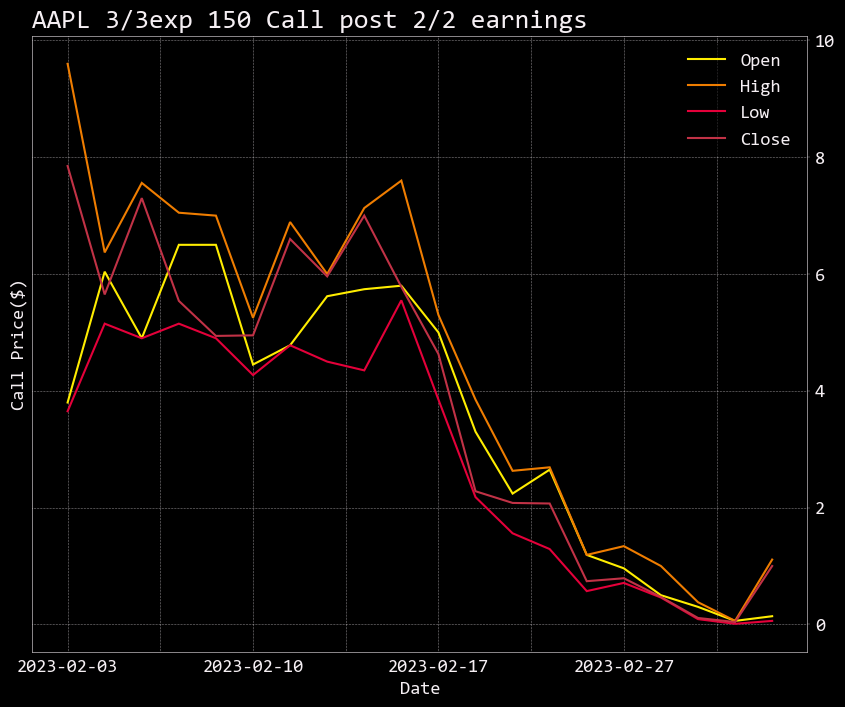

In [25]:
#Clean up the plot
aapl_post_earn_150call.plot(
    title="AAPL 3/3exp 150 Call post 2/2 earnings",
    figsize=(10,8),
    ylabel="Call Price($)"
)

In [ ]:
#add aapl close price to df for comparision 2/3 - 3/3